In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import pickle

from brian2 import *

In [4]:
code_dir = '../code'
sys.path.append(code_dir)

import config
from viz import plot_gating_variables
from utils import eqs_to_dict

In [ ]:
# plt.style.use('paper.mplstyle')

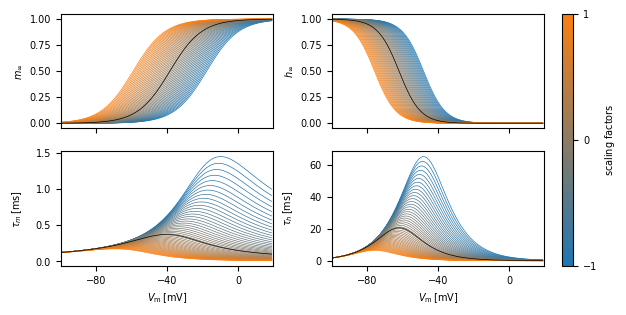

In [28]:
eqs = config.model_dynamics['HH_model']['nd']['eqs']
eqs_dict = eqs_to_dict(eqs, indent='\n')
# var = 'alpha_m'

fig = plt.figure(figsize=(6.3, 3))

subfigs = fig.subfigures(1, 3, width_ratios=[10,10,3], wspace=-.1)

gridspec_kw = {'left': 0.175, 'top': 0.95}

n = 50
c0 = list(plt.colormaps['tab10'](0)[:-1])
c1 = list(plt.colormaps['tab10'](1)[:-1])
dc = [(c1[i] - c0[i])/n for i in range(3)]

plot_kw = {'lw': .5}
fontsize = 7

axes = []
for i_var, var in enumerate(['alpha_m', 'beta_h']):
    axs = subfigs[i_var].subplots(2, 1, sharex=True, gridspec_kw=gridspec_kw)
    for i_g, gating in enumerate(['inf', 'tau']):
        if gating == 'inf':
            gating = '_'.join([var.split('_')[1], gating])
        elif gating == 'tau':
            # var = '_'.join([gating, var])
            gating = '_'.join([gating, var.split('_')[1]])
        ax = axs[i_g]
        sfs = np.linspace(-1, 1, n)
        for i_sf, sf in enumerate(sfs):
            factor = 10**sf
            augmented_eqs = {var: '*'.join([str(factor), eqs_dict[var]]) + ':Hz'}

            c = [tuple([c0[i] + dc[i]*i_sf for i in range(3)] + [1])]
            plot_gating_variables(variables=[gating], v_range=[-100, 20], dv=1, model_name='nd', model_type='HH_model', augmented_eqs=augmented_eqs, c=c, fontsize=fontsize, ax=ax, legend=False, plot_kw=plot_kw)


        lines = plot_gating_variables(variables=[gating], model_name='nd', model_type='HH_model', c='k', fontsize=fontsize, ax=ax, plot_kw=plot_kw, legend=False)
        label = config.variable_dict[gating]['tex']
        if gating.split('_')[0] == 'tau':
            label = label[:-1] + r'\,{\rm [ms]}$'
        ax.set_ylabel(label, size=fontsize)
        if i_g == 0:
            ax.set_xlabel(None)
        else:
            ax.set_xticks([-80, -40, 0])
        ax.set_xlim([-100, 20])
            
        axes.append(axs[i_g])
    subfigs[i_var].align_labels()

n = 100
dc = [(c1[i] - c0[i])/n for i in range(3)]
cmap = (mpl.colors.ListedColormap([tuple([c0[i] + dc[i]*i_sf for i in range(3)] + [1]) for i_sf in range(n)]))
        # .with_extremes(over='0.25', under='0.75'))

ax = subfigs[2].subplots(1, gridspec_kw={'right': 0.25, 'top': 0.95})
bounds = np.linspace(-1, 1, n)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    ticks=bounds,
    orientation='vertical',
)
cbar.set_label(label=r'${\rm scaling\ factors}$', size=fontsize)
ax.set_yticks([-1, 0, 1])
# ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.minorticks_off()

ax.tick_params(labelsize=fontsize)

# for i_ax, ax in enumerate(axes):
#     p = string.ascii_lowercase[i_ax]
#     p_ = r'${\textbf ' + p + '}$'
#     ax.text(1.02, .99, p_, fontsize=8, transform=ax.transAxes, va='top', ha='left', weight='bold')

# fig.tight_layout()

# plt.savefig('Fig-A1_scaling_factors.svg', facecolor='w')
# plt.savefig('Fig-A1_scaling_factors.png', facecolor='w', dpi=300)
# plt.savefig('Fig-A1_scaling_factors.pdf', facecolor='w', dpi=300)